In [1]:
#data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

raw_wine_data = "wine_raw_data.csv"
raw_wine_data_df = pd.read_csv(raw_wine_data)
#gathered only columns needed
reduced_wine_df = raw_wine_data_df.loc[:, ["title", "points", "price", "country", "province", "region_1", "variety", "winery", "description"]]
reduced_wine_df.head()



,title,points,price,country,province,region_1,variety,winery,description
0,Nicosia 2013 Vulkà Bianco (Etna),87,NaN,Italy,Sicily & Sardinia,Etna,White Blend,Nicosia,"Aromas include tropical fruit, broom, brimston..."
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,Portugal,Douro,NaN,Portuguese Red,Quinta dos Avidagos,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,US,Oregon,Willamette Valley,Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Michigan,Lake Michigan Shore,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."


In [2]:
# data frames for our specific data
pinot_noir = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]
chardonnay = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]
cabernet = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]
red_blend = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]

# removed NaN from whole dataframe
df_dropna = reduced_wine_df.dropna()
df_dropna.count()

title          101400
points         101400
price          101400
country        101400
province       101400
region_1       101400
variety        101400
winery         101400
description    101400
dtype: int64

In [3]:
#bar graph with country vs. price
varietygroupby = df_dropna.groupby('variety')
priceaverage = varietygroupby['price'].mean()
pointsaverage = varietygroupby['points'].mean()

varietypricepoints_df = pd.DataFrame({'price average': priceaverage, 'points average': pointsaverage})
varietypricepoints_df = varietypricepoints_df.reset_index('variety')
varietypricepoints_df


,variety,price average,points average
0,Abouriou,35.000000,87.666667
1,Aglianico,38.887755,89.397959
2,Airen,9.000000,81.666667
3,Albana,22.833333,89.277778
4,Albanello,20.000000,86.000000
5,Albariño,21.284188,87.730769
6,Albarossa,40.000000,88.000000
7,Aleatico,39.750000,85.750000
8,Alicante,23.000000,87.400000
9,Alicante Bouschet,25.142857,87.571429


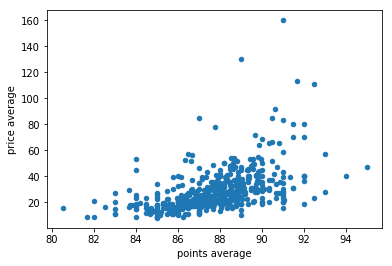

In [6]:
varietypricepoints_df.plot(kind='scatter', x='points average', y='price average')

In [11]:
countrygroupby = df_dropna.groupby('country')
priceaverage = countrygroupby['price'].mean()
pointsaverage = countrygroupby['points'].mean()

countrypricepoints_df = pd.DataFrame({'price average': priceaverage, 'points average': pointsaverage})
countrypricepoints_df = countrypricepoints_df.reset_index('country')
countrypricepoints_df

,country,price average,points average
0,Argentina,24.576289,86.721307
1,Australia,35.446771,88.597731
2,Canada,35.712598,89.377953
3,France,41.217133,88.740174
4,Italy,39.687193,88.617917
5,Spain,28.214471,87.288652
6,US,36.649466,88.576506


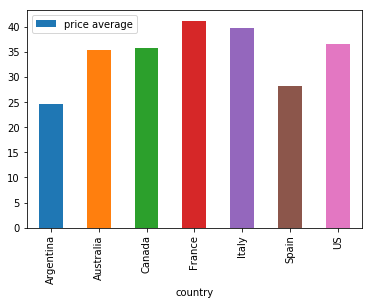

In [14]:
countrypricepoints_df.plot(kind='bar', x='country', y='price average')

# ttest
p1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]["points"]
ch1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]["points"]
ca1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]["points"]
red1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]["points"]
stats.f_oneway(p1, ch1, ca1, red1)

In [17]:
provincegroupby = df_dropna.groupby('province')
provincegroupby.count()

,title,points,price,country,region_1,variety,winery,description
province,,,,,,,,
Alsace,2147,2147,2147,2147,2147,2147,2147,2147
Andalucia,186,186,186,186,186,186,186,186
Arizona,40,40,40,40,40,40,40,40
Australia Other,236,236,236,236,236,236,236,236
Beaujolais,846,846,846,846,846,846,846,846
Bordeaux,3998,3998,3998,3998,3998,3998,3998,3998
British Columbia,158,158,158,158,158,158,158,158
Burgundy,3101,3101,3101,3101,3101,3101,3101,3101
California,36102,36102,36102,36102,36102,36102,36102,36102


In [ ]:
#reduced_wine_df.boxplot("points", by="variety", figsize=(20, 10))
